In [1]:
import numpy as np
import pandas as pd
import re

import nltk
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import sklearn.metrics
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split





In [4]:
df = pd.read_csv('Data_Set.csv')

In [5]:
df.head()

,Unnamed: 0,Function,True_index
0,0,The system shall refresh the display every 60 ...,0
1,1,The application shall match the color of the s...,0
2,2,If projected the data must be readable. On a...,0
3,3,The product shall be available during normal b...,0
4,4,If projected the data must be understandable....,0


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Test\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
#Stopwords Collection depicting all the common and redundant words that are not significant and can be removed
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
df.shape

(625, 3)

In [9]:
# counting null values
df.isnull().sum()

Unnamed: 0    0
Function      0
True_index    0
dtype: int64

In [10]:
#Remove the Unnamed Title
feature_dropped=['Unnamed: 0']
df = df.drop(feature_dropped, axis =1)

In [11]:
df.head()

,Function,True_index
0,The system shall refresh the display every 60 ...,0
1,The application shall match the color of the s...,0
2,If projected the data must be readable. On a...,0
3,The product shall be available during normal b...,0
4,If projected the data must be understandable....,0


In [12]:
df.columns

Index(['Function', 'True_index'], dtype='object')

In [13]:
# Sentiment Analysis 
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score=analyser.polarity_scores(sentence)
    #score format {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}
    return(pd.Series(score)['compound'])

In [15]:
df['function_senti']=df['Function'].apply(lambda x: sentiment_analyzer_scores(x))

In [16]:
df['Function']=df['Function']

In [18]:
print(df['Function'])

0      The system shall refresh the display every 60 ...
1      The application shall match the color of the s...
2      If projected  the data must be readable.  On a...
3      The product shall be available during normal b...
4      If projected  the data must be understandable....
                             ...                        
620    The Disputes application shall manipulate and ...
621    All updates to data files or database must be ...
622    The Disputes application must conform to the l...
623    All business rules specified in the Disputes S...
624    The Disputes application must conform to the l...
Name: Function, Length: 625, dtype: object


In [20]:
#separating the content and label from the table
X= df.drop(columns='True_index', axis=1 )
Y= df['True_index']

In [21]:
print(X)
print(Y)

                                              Function  function_senti
0    The system shall refresh the display every 60 ...          0.0000
1    The application shall match the color of the s...          0.3400
2    If projected  the data must be readable.  On a...          0.0000
3    The product shall be available during normal b...          0.0000
4    If projected  the data must be understandable....          0.0000
..                                                 ...             ...
620  The Disputes application shall manipulate and ...         -0.2732
621  All updates to data files or database must be ...         -0.2732
622  The Disputes application must conform to the l...         -0.1531
623  All business rules specified in the Disputes S...         -0.2732
624  The Disputes application must conform to the l...         -0.0258

[625 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
620    0
621    0
622    0
623    0
624    0
Name: True_index, Length:

In [22]:
# using PorterStemmer for stemming
port_stem= PorterStemmer()

In [27]:
def stemming(Function):
  stemmed_Function= re.sub('[^a-zA-Z]',' ', Function)  # for removing non-alphabetical non-significant characters
  stemmed_Function= stemmed_Function.lower() #converting entire text to lower case 
  stemmed_Function= stemmed_Function.split() #splitting text into list
  stemmed_Function= [port_stem.stem(word) for word in stemmed_Function if not word in stopwords.words('english')] # performing stemming for every word except the stopwords
  stemmed_Function= ' '.join(stemmed_Function) #joining again to string after stemming
  return stemmed_Function

In [28]:
df['Function']= df['Function'].apply(stemming)

In [29]:
print(df['Function'])

0              system shall refresh display everi second
1      applic shall match color schema set forth depa...
2      project data must readabl x project screen vie...
3      product shall avail normal busi hour long user...
4      project data must understand x project screen ...
                             ...                        
620    disput applic shall manipul view busi data use...
621     updat data file databas must initi disput system
622    disput applic must conform legal requir specif...
623    busi rule specifi disput system shall complian...
624    disput applic must conform legal requir specif...
Name: Function, Length: 625, dtype: object


In [30]:
 #separating content and label
 X= df['Function'].values
 Y= df['True_index'].values

In [31]:
print(X)


['system shall refresh display everi second'
 'applic shall match color schema set forth depart homeland secur'
 'project data must readabl x project screen viewer must abl read event activ data view distanc'
 'product shall avail normal busi hour long user access client pc system avail time first six month oper'
 'project data must understand x project screen viewer must abl determin event activ occur current time view distanc'
 'product shall ensur access author user product abl distinguish author unauthor user access attempt'
 'product shall intuit self explanatori'
 'product shall respond fast keep date data display'
 'system shall mdi form allow view graph data tabl'
 'system shall display event vertic tabl time'
 'system shall display event graph time'
 'busi rule specifi disput system shall complianc guidelin regul e regul z'
 'disput applic must maintain detail histori everi action user take disput case ensur complet audit trail question aris later regard particular disput case

In [32]:
print(Y)

[0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [33]:
vectorizer= TfidfVectorizer()
vectorizer.fit(X)

X= vectorizer.transform(X)

In [34]:
print(X)

  (0, 933)	0.21343343898778527
  (0, 867)	0.13111470784745252
  (0, 847)	0.41634291557650344
  (0, 770)	0.6188883183902117
  (0, 331)	0.4771481156673681
  (0, 273)	0.3914340330533316
  (1, 867)	0.07349181653273806
  (1, 864)	0.30042260099421086
  (1, 850)	0.30042260099421086
  (1, 837)	0.38662023558239045
  (1, 556)	0.38662023558239045
  (1, 432)	0.38662023558239045
  (1, 381)	0.34689645041429223
  (1, 253)	0.3148252569360693
  (1, 179)	0.3071726652461941
  (1, 60)	0.2277250949099976
  (2, 1025)	0.27925965748401077
  (2, 1024)	0.19355761544170316
  (2, 841)	0.2567618052036604
  (2, 756)	0.29711720746320397
  (2, 755)	0.29711720746320397
  (2, 734)	0.5331790482758003
  (2, 601)	0.2639620679640467
  (2, 330)	0.2083765718991633
  (2, 275)	0.27925965748401077
  :	:
  (622, 274)	0.2311152019202806
  (622, 201)	0.3862787263368918
  (622, 60)	0.26328401097812276
  (623, 933)	0.14313017175960968
  (623, 895)	0.31997934379042153
  (623, 867)	0.08792657206582762
  (623, 826)	0.41503145772896677


In [35]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, stratify= Y, random_state=2)

In [36]:
model= LogisticRegression()

In [37]:
model.fit(X_train, Y_train)

LogisticRegression()

In [38]:
X_train_prediction= model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)
print('Accuracy Score of the training data: ',training_data_accuracy )


Accuracy Score of the training data:  0.944


In [40]:
#accuracy score on the testing data
X_test_prediction= model.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_prediction, Y_test)
print('Accuracy Score of the testing data: ',testing_data_accuracy )

Accuracy Score of the testing data:  0.864


In [41]:
confusion_matrix( Y_test, X_test_prediction,labels=[1,0])

array([[39, 12],
       [ 5, 69]], dtype=int64)

C:\Users\Test\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


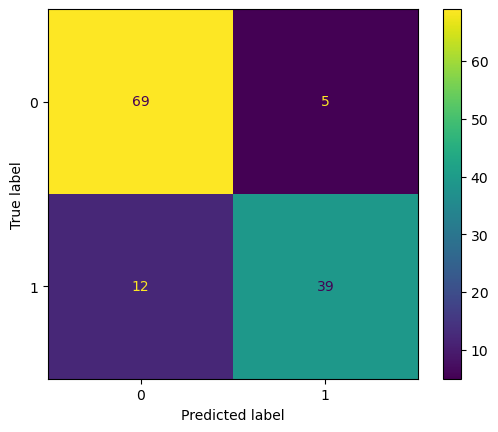

In [42]:
plot_confusion_matrix( model, X_test, Y_test)

In [44]:
#LogisticRegression
model_1= LogisticRegression()
model_1.fit(X_train, Y_train)
pred_1= model_1.predict(X_test)
cr1    = classification_report(Y_test,pred_1)
print(cr1)


              precision    recall  f1-score   support

           0       0.85      0.93      0.89        74
           1       0.89      0.76      0.82        51

    accuracy                           0.86       125
   macro avg       0.87      0.85      0.86       125
weighted avg       0.87      0.86      0.86       125



In [45]:
#DecisionTreeClassifier
model_2= DecisionTreeClassifier()
model_2.fit(X_train, Y_train)
pred_2= model_2.predict(X_test)
cr2    = classification_report(Y_test,pred_2)
print(cr2)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        74
           1       0.64      0.76      0.70        51

    accuracy                           0.73       125
   macro avg       0.73      0.73      0.73       125
weighted avg       0.74      0.73      0.73       125



In [46]:
#PassiveAggressiveClassifier
model_3= PassiveAggressiveClassifier()
model_3.fit(X_train, Y_train)
pred_3= model_3.predict(X_test)
cr3    = classification_report(Y_test,pred_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        74
           1       0.76      0.86      0.81        51

    accuracy                           0.83       125
   macro avg       0.83      0.84      0.83       125
weighted avg       0.84      0.83      0.83       125



In [47]:
#OneClassSVM
model_4= OneClassSVM()
model_4.fit(X_train, Y_train)
pred_4= model_4.predict(X_test)
cr4    = classification_report(Y_test,pred_4)
print(cr4)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00        74
           1       0.48      0.25      0.33        51

    accuracy                           0.10       125
   macro avg       0.16      0.08      0.11       125
weighted avg       0.20      0.10      0.14       125



C:\Users\Test\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Test\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Test\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Test\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [48]:
#MultinomialNB
model_5= MultinomialNB()
model_5.fit(X_train, Y_train)
pred_5= model_5.predict(X_test)
cr5    = classification_report(Y_test,pred_5)
print(cr5)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        74
           1       0.89      0.80      0.85        51

    accuracy                           0.88       125
   macro avg       0.88      0.87      0.87       125
weighted avg       0.88      0.88      0.88       125



In [49]:
#RandomForestClassifier
model_6= RandomForestClassifier()
model_6.fit(X_train, Y_train)
pred_6= model_6.predict(X_test)
cr6    = classification_report(Y_test,pred_6)
print(cr6)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        74
           1       0.85      0.69      0.76        51

    accuracy                           0.82       125
   macro avg       0.83      0.80      0.81       125
weighted avg       0.83      0.82      0.82       125



In [52]:
fig = px.pie(df,names='True_index',title='function Requirment vs. Non-function Requirment')
fig.show()

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Non-function Requirment')]

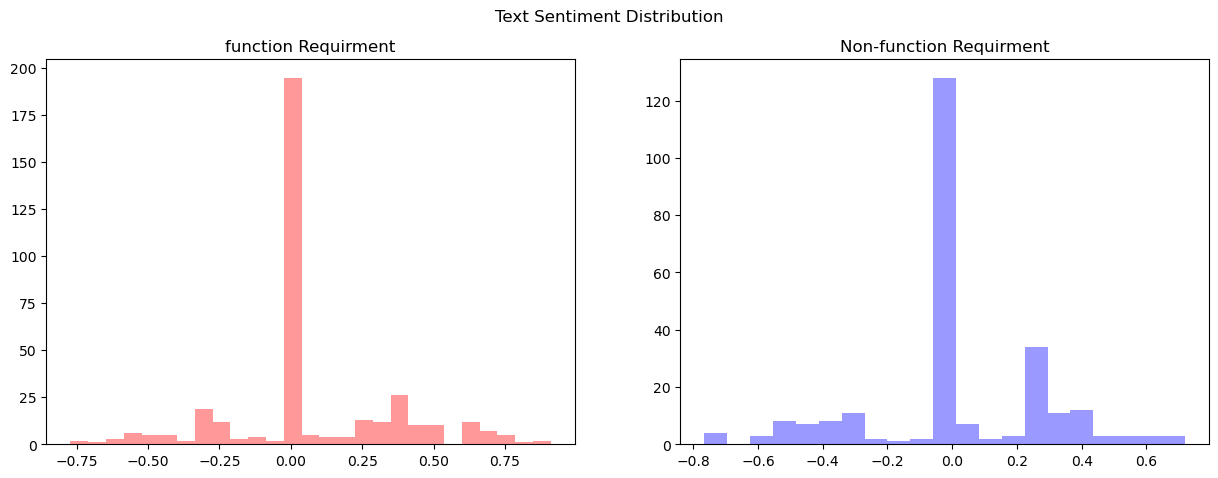

In [57]:
import seaborn as sns
f, axes=plt.subplots(1, 2, figsize=(15, 5) )
f.suptitle("Text Sentiment Distribution")

sns.distplot(df[df.True_index==0]['function_senti'], ax=axes[0], kde=False, color='red')
axes[0].set(xlabel=None, title='function Requirment')
sns.distplot(df[df.True_index==1]['function_senti'], ax=axes[1], kde=False, color='blue')
axes[1].set(xlabel=None, title='Non-function Requirment')